<a href="https://colab.research.google.com/github/pedrocz82/Data-Science-learning-projects/blob/main/Recursos_humano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução**

Contratar e reter talentos é uma tarefa extremamente desafiadora, que requer tempo, investimento financeiro e habilidades.
Por isso, é necessário desenvolver um modelo que preveja qual candidato é mais propenso a se enquadrar no perfil da empresa, tendo como base os dados dos candidatos, como envolvimento no trabalho, escolaridade, satisfação com o trabalho, avaliação de desempenho, equilíbrio vida pessoal e profissional. 
Ao desenvolver modelos mais precisos que podem prever a retenção do colaborador, a empresa pode reduzir custos operacionais e a possibilidade de o funcionário a ser contratado ficar satisfeito em trabalhar com a empresa pode ser maior. 
Este trabalho apoiou-se em um dataset fornecido pelo curso da Udemy "Solve 6 real Business Problems" do Professor Dr. Ryan Ahmed.


**Significado das colunas do dataset**

O dataset disponibiliza algumas variáveis para para auxiliar no desenvolvimento de um modelo de previsão de retenção de funcionários. São explicadas abaixo todas elas, sendo a maioria apenas uma tradução livre, com o significado intuitivo.

Employee count, Employee number, StandardHours, Over18 - serão retirados do DataFrame, pois os dados não são relevantes para este estudo

Age - idade dos funcionários

Attrition - indica se o funcionário possui atrito ou algum problema no ambiente de trabalho

BusinessTravel - frequência com que o funcionário viaja a negócios

DailyRate - quanto o funcionário está ganhando diariamente

Department - área de atuação do funcionário

DistanceFromHome -  distância entre o trabalho e a casa do funcionário

Education - nível educacional do funcionário

EducationField - campo de estudo do funcionário

EnvironmentSatisfaction - satisfação do funcionário com o ambiente

Gender - gênero do funcionário

hourly rate - ganho por hora

JobInvolvement - envolvimento, engajamento com o trabalho

JobLevel - nível do trabalho

JobRole - cargo do funcionário

JobSatisfaction - satisfação com o trabalho

MaritalStatus - estado civil

MonthlyIncome - renda mensal

MonthlyRate - salário

NumCompaniesWorked - número de empresas em que o funcionário trabalhou

OverTime - hora extra

PercentSalaryHike - aumento percentual do salário

PerformanceRating - grau de performance do funcionário

RelationshipSatisfaction - grau de satisfação do funcionário

StockOptionLevel - nível de opção de ações

TotalWorkingYears - total de anos trabalhando

TrainingTimesLastYear - quantidade de treinamentos no último ano

WorkLifeBalance - equilíbrio entre vida pessoal e o trabalho

YearsAtCompany - quantidade de anos na empresa

YearsInCurrentRole - quantidade de anos na posição atual

YearsSinceLastPromotion - quantidade de anos desde a última promoção 

YearsWithCurrManager - quantidade de anos que o funcionário está com o mesmo gerente 

# **Análise exploratória dos dados**

In [1]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# importar o arquivo Human_Resources.csv para um DataFrame
df = pd.read_csv('/content/sample_data/Human_Resources.csv')

In [3]:
# mostrar as 3 primeiras entradas
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0


In [4]:
#dimensões do DataFrame (linhas, colunas)
print('Dimensões do DataFrame:')
print(f'Linhas: {df.shape[0]}')
print(f'Colunas: {df.shape[1]}')

Dimensões do DataFrame:
Linhas: 1470
Colunas: 35


"dtypes" retorna uma Series com o tipo de dados de cada coluna. O índice do resultado são as colunas do DataFrame original. As colunas com tipos mistos são armazenadas com o objeto dtype.
Neste DataFrame, os dados compreendem tanto strings como inteiros:

In [5]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
#checagem de valores faltantes, valores faltantes/total e tipo
for column in df.columns:
    if df[column].isnull().sum() != 0:
        print("_________________________________________________________________________________________________________")
        print(f"{column} -> Missing Values: {df[column].isnull().sum()} |Missing Values/total__ : {df[column].isnull().sum()/df.shape[0]} | dtypes: {df[column].dtypes}")

Neste caso, não há valores faltantes

In [7]:
#removendo possíveis duplicatas
df.drop_duplicates(inplace=True)

In [8]:
#confirmando retirada das duplicatas
df.duplicated().sum()

0

A função describe() nos fornece alguns parâmetros de estatística descritiva. Esta função retorna a contagem, a média, o desvio padrão, os valores mínimo e máximo e os quartis dos dados.

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


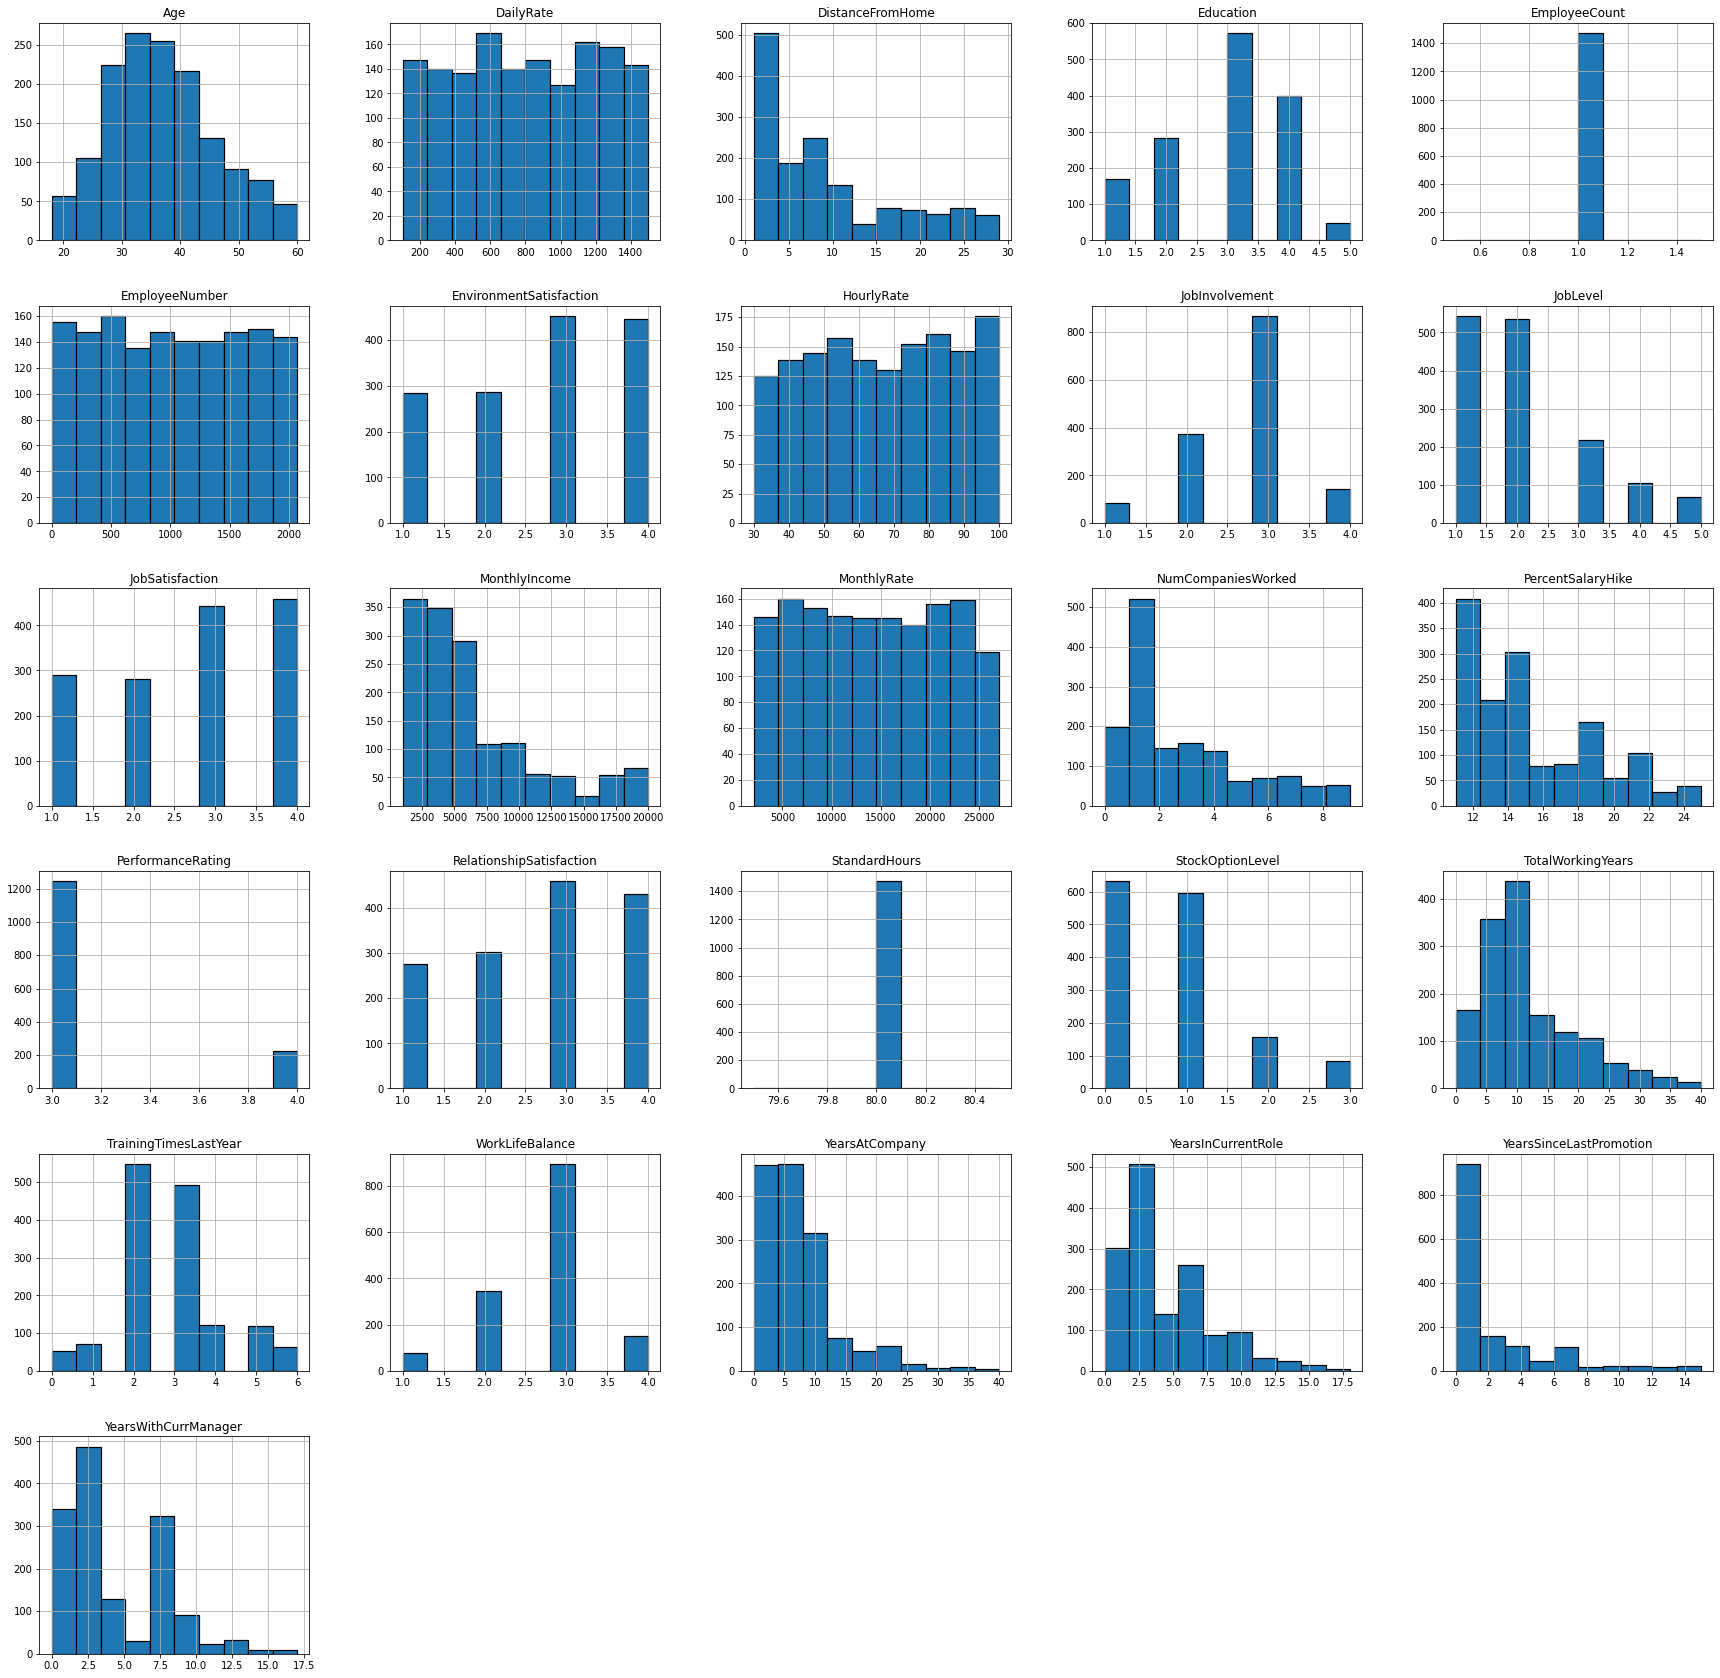

In [ ]:
#distribuição em Histograma das variaveis
df.hist(edgecolor="black", linewidth=1.2, figsize=(30, 30));

A variável "Monthly income" possui uma assimetria em sua distribuição, mais deslocada para a esquerda, ou seja, a maior parte dos rendimentos mensais tendem a ser menores, o que faz sentido, uma vez que a maior parte dos funcionarios ganham menos que os cargos de hierarquia maiores, que possuem menos pessoas.

A maior parte dos funcionarios tem menos de 10 anos na empresa.

serão retiradas algumas variaveis cujos valores não mudam de um funcionario ao outro e, portanto, não contribuem para as análises: "EmployeeCount", "StandardHours" e "Over18" tem apenas 1 único valor

In [9]:
df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis = 1, inplace = True)

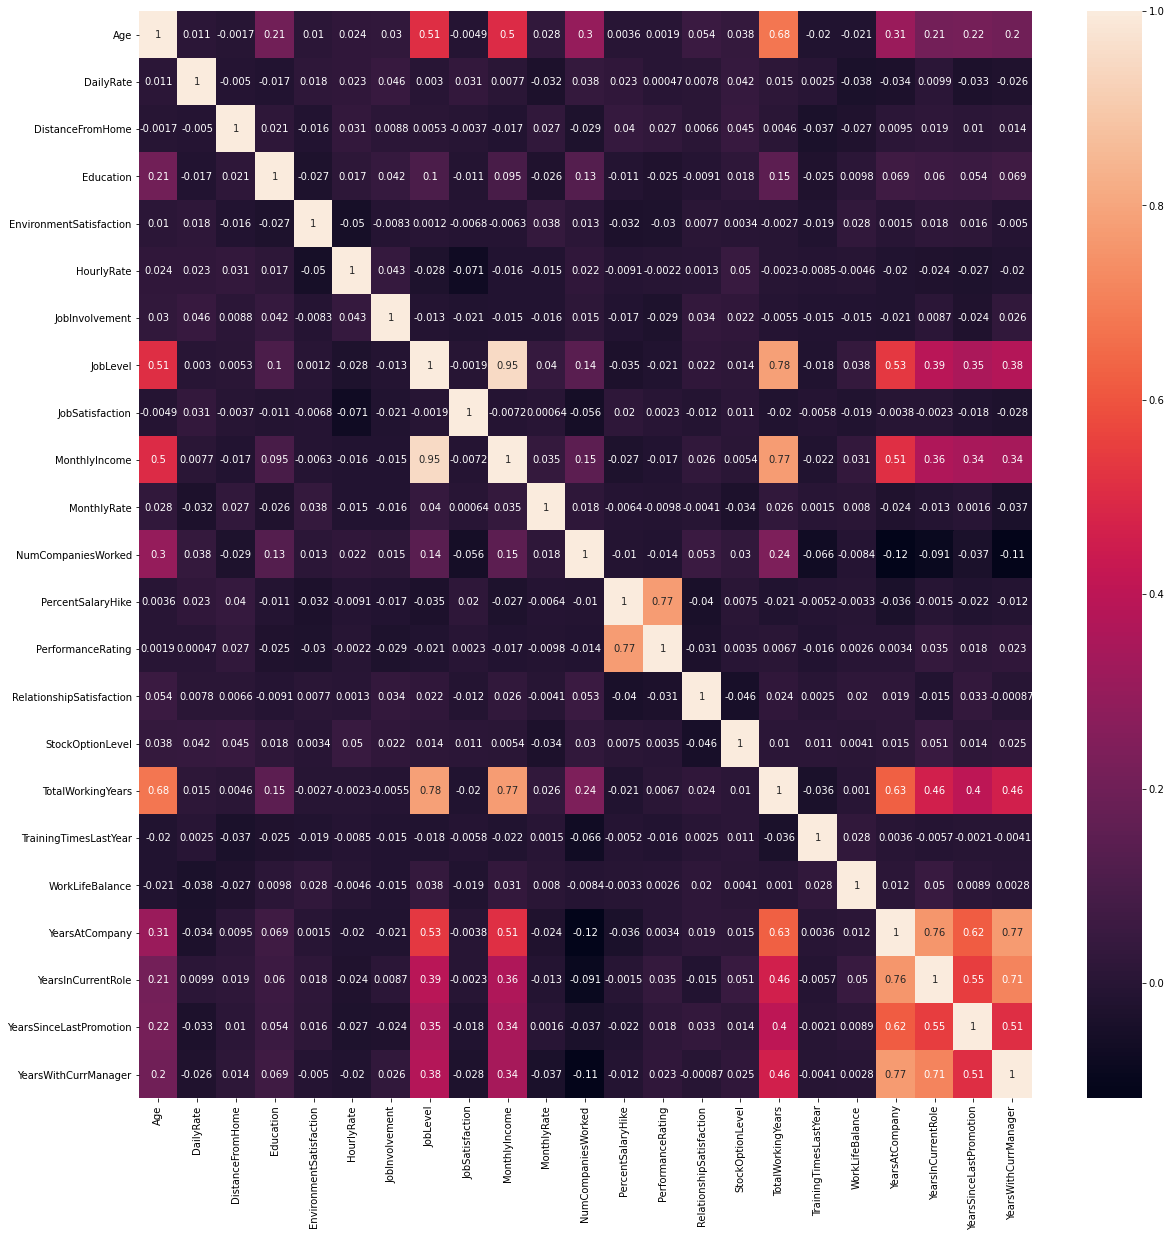

In [10]:
#correlação entre as variáveis
correlations = df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

Quantos funcionários trabalham na companhia?

In [11]:
print(df.Department.value_counts())

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


Distribuição dos funcionários por área

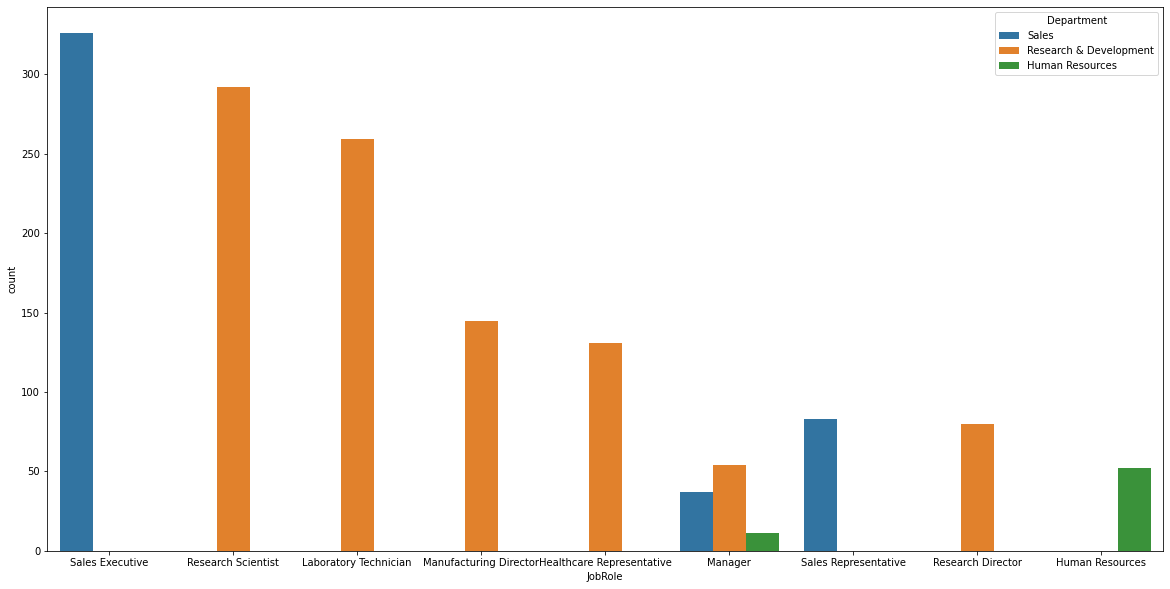

In [12]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="JobRole", hue="Department", data=df)

Quantos funcionários deixaram a empresa?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


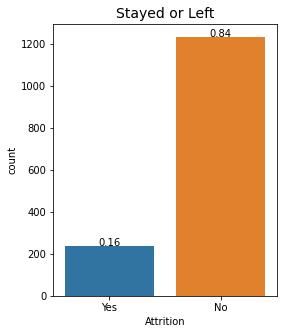

In [13]:
plt.figure(figsize=(4,5))
ax = sns.countplot(df.Attrition)
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.title('Stayed or Left', fontsize=14);

Podemos extrair os dados das pessoas que deixaram a companhia para procurar compreender melhor os motivos. Para comparar com aqueles funcionários que não deixaram a companhia, separamos em 2 DataFrames.

In [14]:
left_df = df[df['Attrition'] == 'Yes']

In [15]:
stayed_df = df[df['Attrition'] == 'No']

In [16]:
left_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,7208.153264,2.678519,3.770294,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,12.000000,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,14618.000000,1.000000,14.000000,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,21081.000000,5.000000,17.000000,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [17]:
stayed_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.64558,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,7102.260749,2.46009,3.639511,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.00000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,7973.000000,1.00000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,14120.000000,2.00000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8834.000000,20364.000000,4.00000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26997.000000,9.00000,25.000000,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


A média de idade dos funcionários que ficaram na companhia é maior, assim como o ganho diário. 
A distância entre a casa do funcionário e o trabalho tende a ser menor, na média.


A distribuição das idades pode ser melhor visualizada com um gráfico sobreposto. 

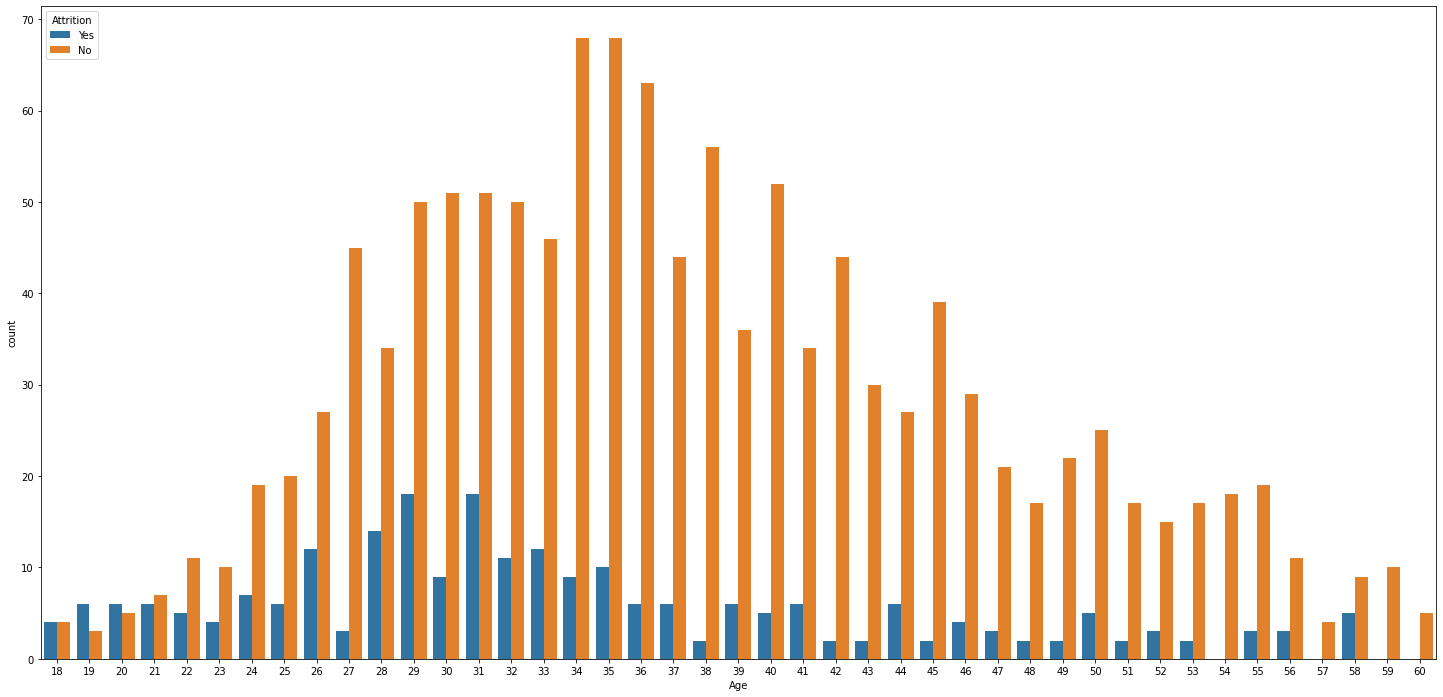

In [18]:
plt.figure(figsize = [25, 12])
sns.countplot(x = 'Age', hue = 'Attrition', data = df)

Nos gráficos seguintes avaliamos a saída dos funcionários em comparação com alguns fatores.
Observa-se que uma parcela significativa pertence à área de vendas. Técnicos de laboratório também tem uma proporção mais alta. Cargos de maior hierarquia possuem maior retenção de funcionários, como diretores de pesquisa e gerentes. Esta observação reflete-se também no nível do cargo do funcionário.
Proporcionalmente, a parcela de funcionários solteiros que saem da companhia é maior. 
O envolvimento com o trabalho, assim como a satisfação com o trabalho também segue uma lógica coerente com o esperado. Funcionários que se envolvem mais com o trabalho ou que estão satisfeitos com o trabalho, proporcionalmente, tendem a ficar na companhia.

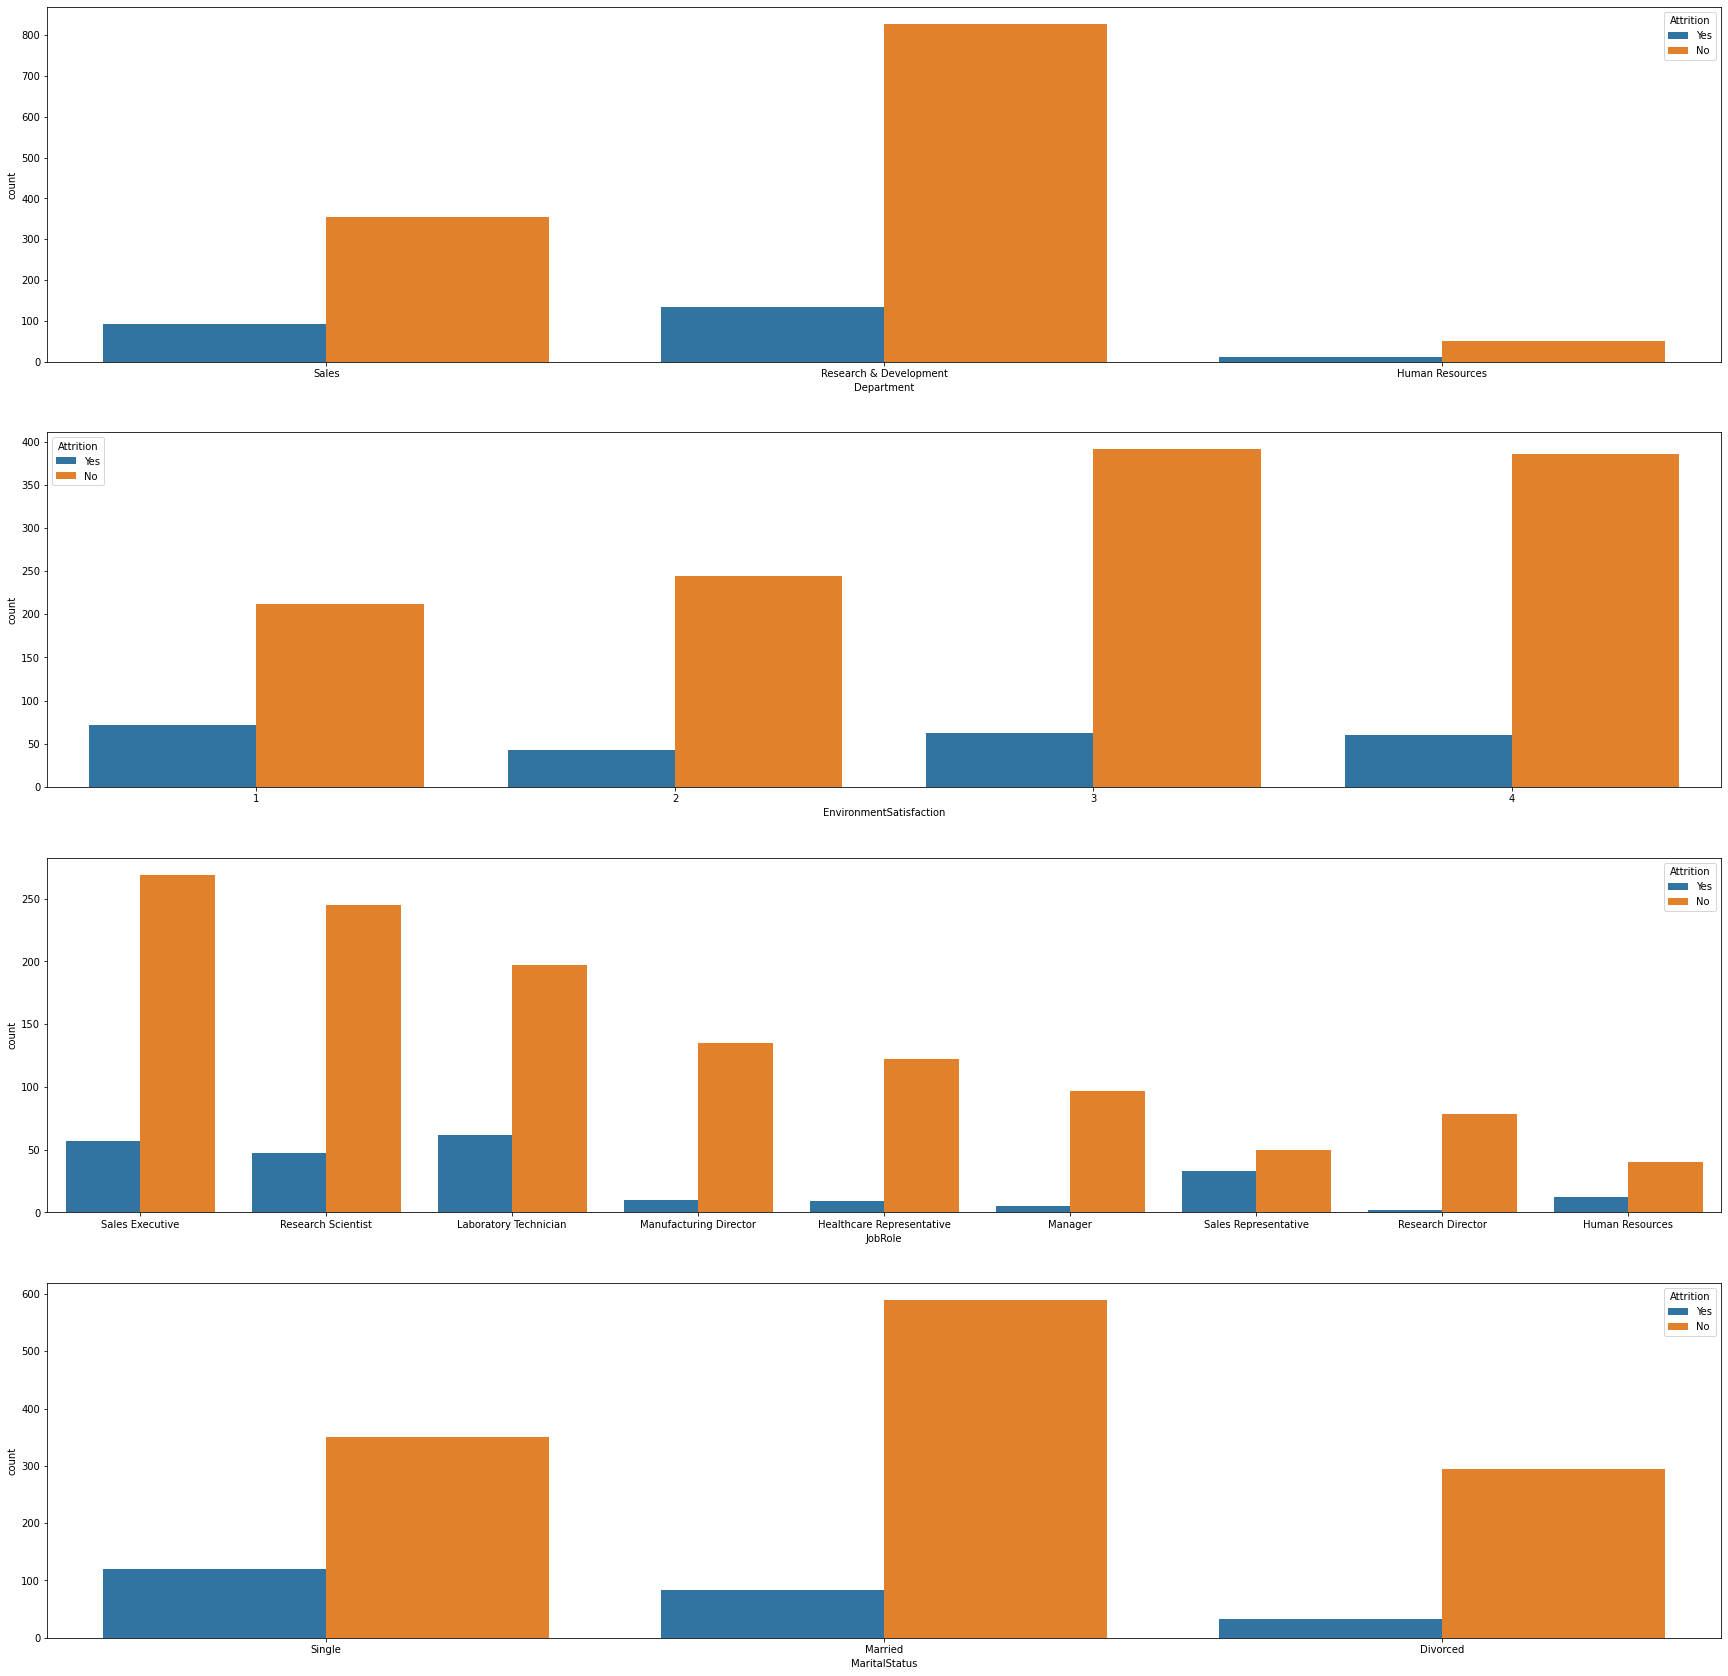

In [19]:
plt.figure(figsize = [30, 30])

plt.subplot(411)
sns.countplot(x = 'Department', hue = 'Attrition', data = df)

plt.subplot(412)
sns.countplot(x = 'EnvironmentSatisfaction', hue = 'Attrition', data = df)

plt.subplot(413)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = df)

plt.subplot(414)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = df)


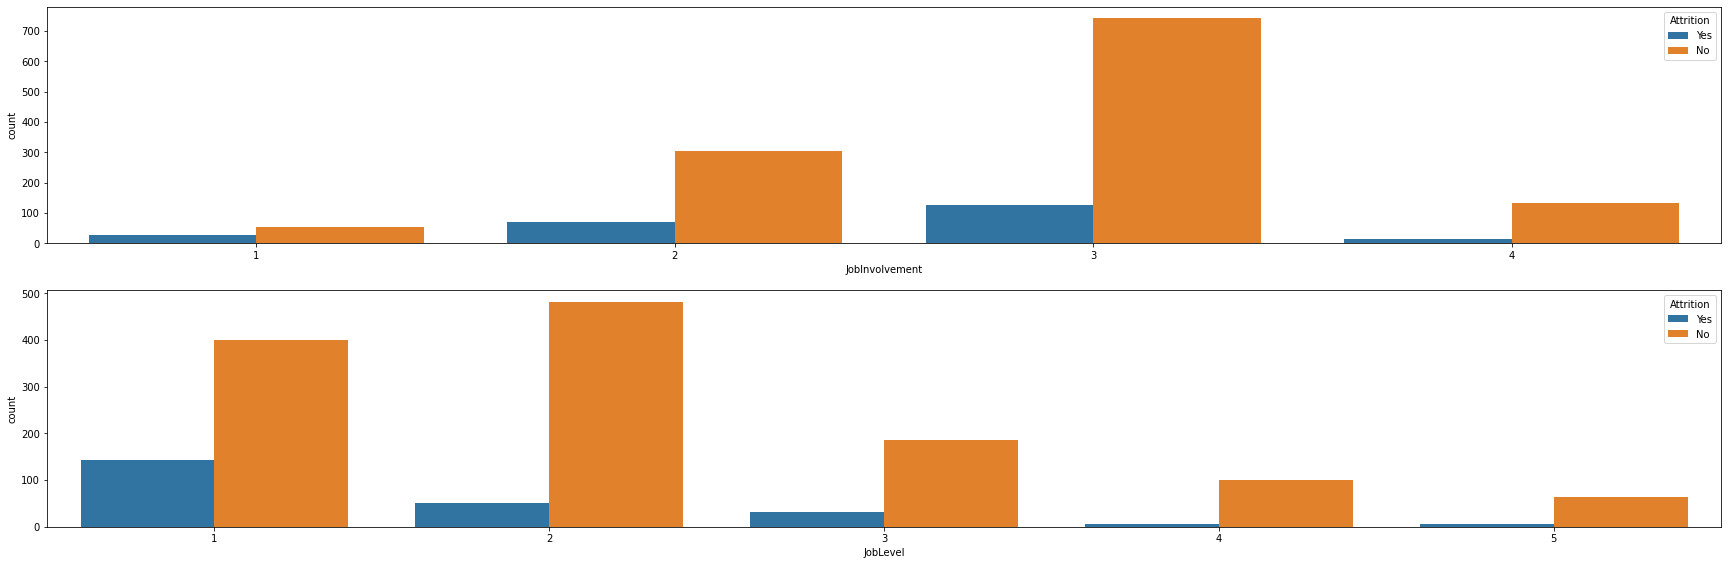

In [20]:
plt.figure(figsize = [30, 20])

plt.subplot(411)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = df)

plt.subplot(412)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = df)

Podemos avaliar a distribuição do aumento percentual de salário entre os departamentos. Comparativamente, todos os departamentos apresentam a mesma distribuição.

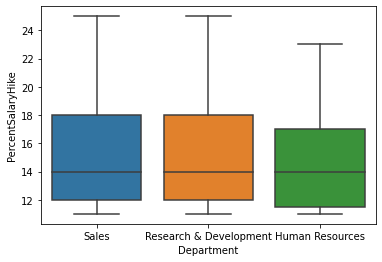

In [21]:
ax = sns.boxplot(x="Department", y="PercentSalaryHike", data=df)

Entre homens e mulheres a distribuição é similar

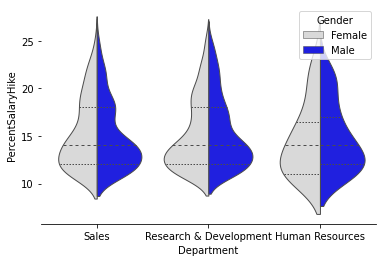

In [22]:
sns.violinplot(data=df, x="Department", y="PercentSalaryHike", hue="Gender",
               split=True, inner="quart", linewidth=1,
               palette={"Male": "b", "Female": ".85"})
sns.despine(left=True)

A mesma observação pode ser feita quando consideramos os campos de aplicação

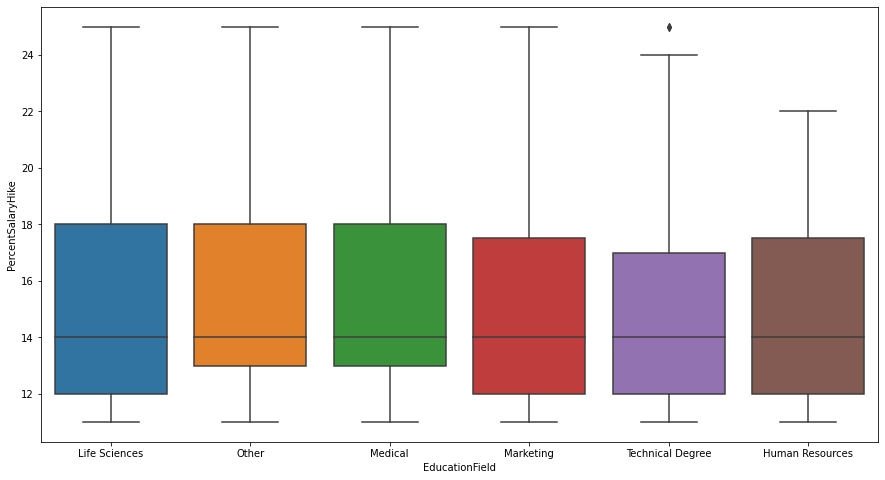

In [23]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="EducationField", y="PercentSalaryHike", data=df)

Podemos visualizar a densidade de probabilidade de uma variável contínua usando estimativa de densidade de kernell (KDE). 
Um exemplo de aplicação é avaliar a probabilidade do funcionário deixar a companhia em relação ao tempo que ele tem de empresa. Usamos os dados dos 2 DataFrames criados, sendo 1 dos funcionários que deixaram a companhia e 1 dos funcionários que permanecem na comapanhia.
No gráfico observamos que funcionários com tempo de empresa menor tendem a sair da companhia, com probabilidade maior que os funcionários que tem tempo de empresa maior.

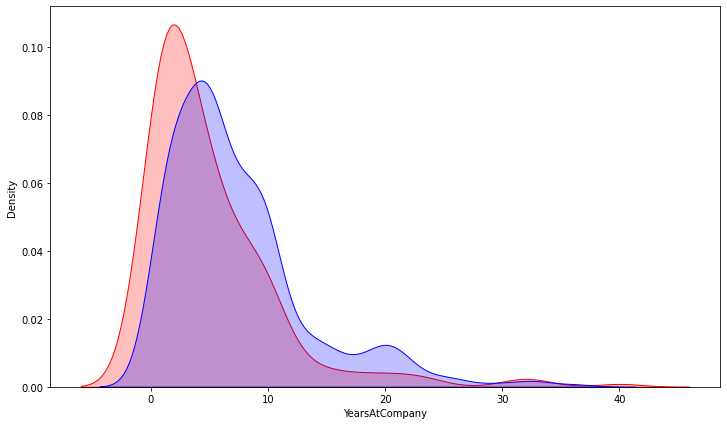

In [24]:
plt.figure(figsize= (12,7))

sns.kdeplot(left_df['YearsAtCompany'], label = 'Funcionários que deixaram a companhia', shade = True, color = 'r')
sns.kdeplot(stayed_df['YearsAtCompany'], label = 'Funcionários que permaneceram na companhia', shade = True, color = 'b')

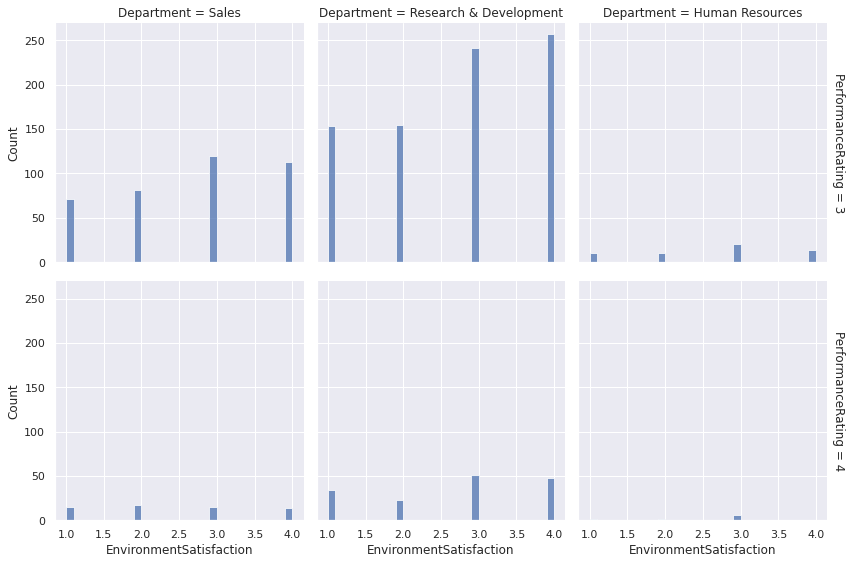

In [25]:
sns.set_theme(style="darkgrid")

sns.displot(
    df, x="EnvironmentSatisfaction", col="Department", row="PerformanceRating",
    binwidth=.1, height=4, facet_kws=dict(margin_titles=True),
)

Como são as desistências nos departamentos?

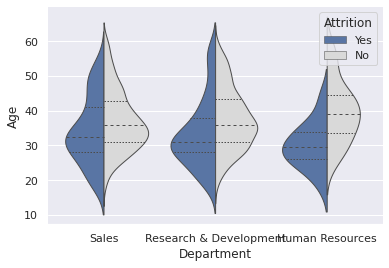

In [26]:
sns.violinplot(data=df, x="Department", y="Age", hue="Attrition",
               split=True, inner="quart", linewidth=1,
               palette={"Yes": "b", "No": ".85"})
sns.despine(left=True)

# **Modelo de previsão**

Nesta segunda parte do trabalho o objetivo é desenvolver um modelo que preveja qual funcionário tem maior probabilidade de sair da empresa.
A base de dados é o arquivo Human_Resources.csv, utilizado anteriormente para análise exploratória de dados.

In [28]:
#não será incluida a variável "Attrition", pois será nosso target
X_cat = df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 
'MaritalStatus']]

In [29]:
from sklearn.preprocessing import OneHotEncoder

In [30]:
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [31]:
#converter esta informação em um DataFrame
X_cat = pd.DataFrame(X_cat)

In [32]:
X_cat.shape

(1470, 26)

In [33]:
#pegar variáveis numéricas e salvar em uma variável
X_numerical = df[['Age', 'DailyRate',
       'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [34]:
#concatenando os dois conjuntos de dados
X_all = pd.concat([X_cat, X_numerical], axis = 1)

In [35]:
#escalonamento
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)

In [36]:
y = df['Attrition']

In [38]:
y

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

**Avaliação da aplicação de regressão logistica**

In [39]:
#dividir os dados em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [40]:
X_train.shape

(1102, 49)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [42]:
#instanciar um objeto modelo e aplicar o método fit() que calcula os parâmetros de aprendizagem de cada modelo
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
#treinar o modelo
y_pred = model.predict(X_test)

In [44]:
#avaliação das métricas do modelo
from sklearn.metrics import confusion_matrix, classification_report

In [45]:
print(f'Accuracy %: {accuracy_score(y_pred, y_test):.02f} %')

Accuracy %: 0.82 %


Na matriz de confusão, vemos que o modelo classifica corretamente aproximadamente 3000 funcionários, (quadrante no canto superior esquerdo e inferior direito) e 47 funcionários não previstos corretamente.

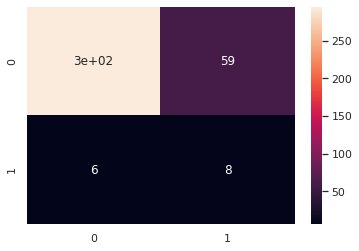

In [46]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [47]:
#Relatório do modelo
print(classification_report(y_test, y_pred))   #na udemy, o instrutor usou 0 e 1 e não "yes ou no"

              precision    recall  f1-score   support

          No       0.83      0.98      0.90       301
         Yes       0.57      0.12      0.20        67

    accuracy                           0.82       368
   macro avg       0.70      0.55      0.55       368
weighted avg       0.79      0.82      0.77       368



**Avaliação da aplicação de random forest**

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [50]:
y_pred = model.predict(X_test)

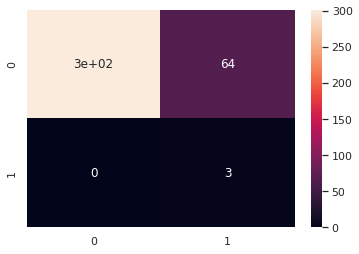

In [51]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [52]:
#Relatório do modelo
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

          No       0.82      1.00      0.90       301
         Yes       1.00      0.04      0.09        67

    accuracy                           0.83       368
   macro avg       0.91      0.52      0.49       368
weighted avg       0.86      0.83      0.75       368



# **Conclusão**

Neste trabalho foi realizada uma análise exploratória de um dataset de recursos humanos e foram levantados algumas informações, a partir dos dados do dataset. Foi possível extrair algumas informações interessantes, entre as quais podemos citar que a maior parte dos funcionarios tem menos de 10 anos na empresa. A média de idade dos funcionários que ficaram em comparação com os que foram desligados. Observamos que distância entre a casa do funcionário e o trabalho é um fator a ser ponderado também ao considerar a sua retenção. Também é notável que cargos de maior hierarquia possuem maior retenção de funcionários, como diretores de pesquisa e gerentes. Considerando o estado civil, observou-se que a parcela de funcionários solteiros que saem da companhia é maior. 
Na segunda parte do trabalho, focamos na aplicação de machine learning para previsão de retenção de um funcionário da companhia com base nos dados do dataset. Foram usados modelos de regressão logística e "random forest". Este último apresentou resultados melhores em relação à precisão.
